In [2]:
import numpy as np
import qiskit as q
from qiskit import QuantumCircuit
from qiskit import Aer #simulator framework for qiskit
from matplotlib import style
style.use("classic")
%matplotlib inline

In [3]:
nqubits = 5

In [4]:
# apply Hadamard gate to all qubits
def initialize_s(qc, qubits):
    for q in qubits:
        qc.h(q)
        
    return qc

Solutions:
|00000>
|00111>
|11111>


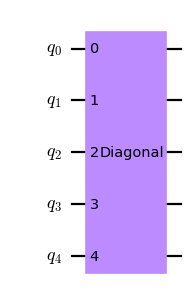

In [5]:
import math
from math import pi
# Oracle circuit

oracle = QuantumCircuit(nqubits, name='oracle$_\omega$')

#theta = pi # theta can be anything (pi chosen arbitrarily)
#oracle.ry(theta/2,1)
#oracle.cx(0,1)
#oracle.ry(-theta/2,1)
#oracle.cx(0,1)


#oracle.h(2)
#oracle.ccx(0,1,2)
#oracle.h(2)

#oracle.ch(0,2)
#oracle.cz(1,2)
#oracle.ch(0,2)

#oracle.ch(0,2)
#oracle.ccx(1,3,2)
#oracle.ch(0,2)

#for qubit in range(nqubits-1):
#    oracle.cz(qubit, nqubits-1)



from qiskit_textbook.problems import grover_problem_oracle
oracle = grover_problem_oracle(nqubits, variant=119, print_solutions = True)


oracle.to_gate()

oracle.draw('mpl')

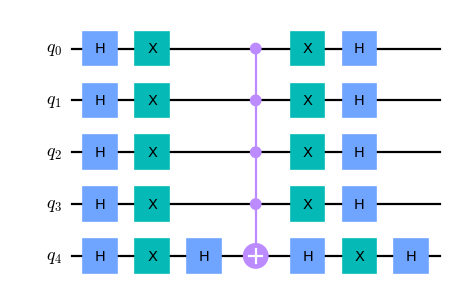

In [6]:
# Diffuser circuit

diffuser = QuantumCircuit(nqubits, name='diffuser$_s$')
for qubit in range(nqubits):
    diffuser.h(qubit)
for qubit in range(nqubits):
    diffuser.x(qubit)
# Do multi-controlled-Z gate
diffuser.h(nqubits-1)
diffuser.mct(list(range(nqubits-1)), nqubits-1)
diffuser.h(nqubits-1)
for qubit in range(nqubits):
    diffuser.x(qubit)
for qubit in range(nqubits):
    diffuser.h(qubit)
diffuser.to_gate()
diffuser.draw('mpl')


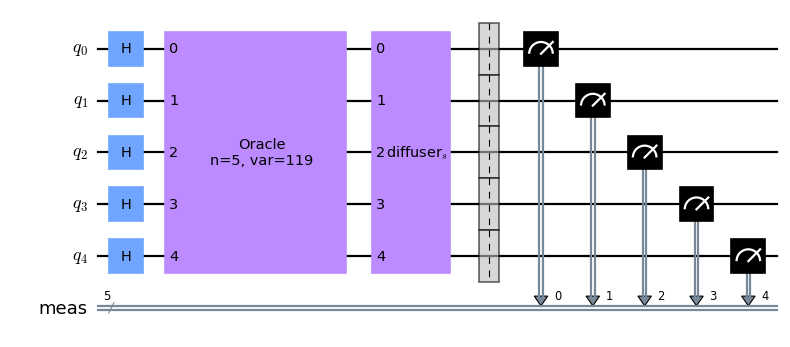

In [7]:
grover_circuit = QuantumCircuit(nqubits)
grover_circuit = initialize_s(grover_circuit, range(nqubits))
grover_circuit.append(oracle, range(nqubits))
grover_circuit.append(diffuser, range(nqubits))
grover_circuit.measure_all()
grover_circuit.draw('mpl')

{'00111': 215, '00000': 207, '11111': 251}


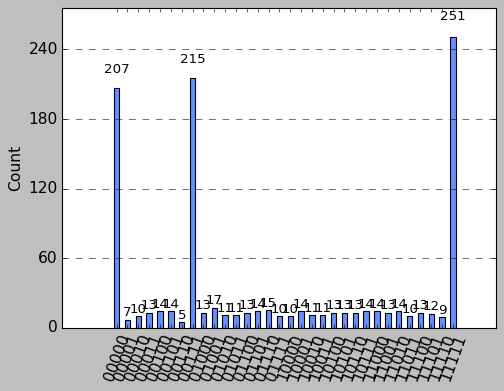

In [8]:
from qiskit.visualization import plot_histogram

backend = Aer.get_backend("aer_simulator")

job = q.execute(grover_circuit, backend=backend, shots=1024)
result = job.result()
counts = result.get_counts(grover_circuit)

print(dict((k, v) for k, v in counts.items() if v >= 40))
plot_histogram([counts])

Job ID is chd4lotv6mngo8nnuokg
job is being initialized
{'00111': 0.224609375, '11111': 0.2255859375, '00000': 0.2294921875}


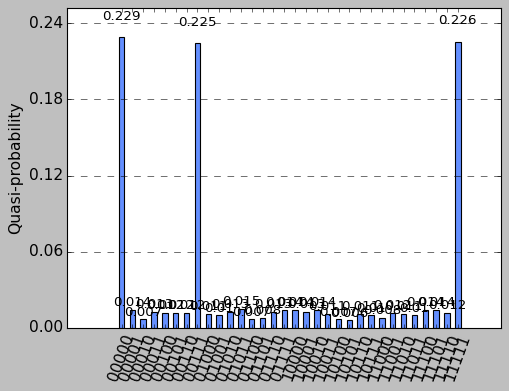

In [8]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Options, Sampler
from qiskit.visualization import plot_histogram

QiskitRuntimeService.save_account(channel="ibm_quantum", token="", overwrite=True)
service = QiskitRuntimeService()

options = Options(optimization_level=1)
options.execution.shots = 1024

with Session(service=service, backend="ibmq_qasm_simulator") as session:
    sampler = Sampler(session=session, options=options)
    job = sampler.run(circuits=grover_circuit)
    print(f"Job ID is {job.job_id()}")
    print(job._status._value_)
    result = job.result()
binary_prob = result.quasi_dists[0].binary_probabilities()

print(dict((k, v) for k, v in binary_prob.items() if v >= 0.02))
plot_histogram([binary_prob])

job_belem ID is chd4lp9mfb1ddb68ritg
job is being initialized
{'00000': 0.0323951999979744, '00001': 0.02633595073911002, '00010': 0.03366277882332596, '00011': 0.03303361937259716, '00100': 0.03410863712450787, '00101': 0.031658813641028474, '00110': 0.023162102087118205, '00111': 0.04332168745022598, '01000': 0.031888485396564824, '01001': 0.03485366639070843, '01011': 0.034821186538405255, '01100': 0.03005891767518596, '01101': 0.03014277246734234, '01110': 0.03193565275678884, '01111': 0.03043520540771907, '10000': 0.03177827931461585, '10001': 0.03640638550268546, '10011': 0.04388613413275374, '10100': 0.022508463681286343, '10101': 0.028748892658186788, '10110': 0.04422113265666375, '10111': 0.026421566885111464, '11001': 0.031713372868281214, '11010': 0.032316267937827534, '11011': 0.029822122355622503, '11100': 0.022141440428766524, '11101': 0.031339028008578164, '11110': 0.026258417403403934, '11111': 0.05610695740409374}


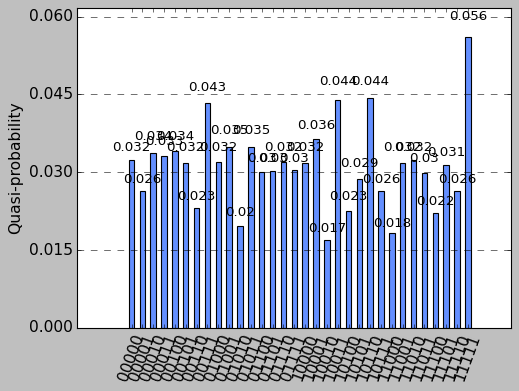

In [9]:
# ibmq_belem 16 QV
with Session(service=service, backend="ibmq_belem") as session:
    sampler_belem = Sampler(session=session, options=options)
    job_belem = sampler_belem.run(circuits=grover_circuit)
    print(f"job_belem ID is {job_belem.job_id()}")
    print(job_belem._status._value_)
    result_belem = job_belem.result()
binary_prob_belem = result_belem.quasi_dists[0].binary_probabilities()

print(dict((k, v) for k, v in binary_prob_belem.items() if v >= 0.02))
plot_histogram([binary_prob_belem])

job_manila ID is chd4sphmfb1ddb690i8g
job is being initialized
{'00000': 0.03387048162434108, '00001': 0.03946196944113393, '00010': 0.03330197073583193, '00011': 0.04205448130440327, '00100': 0.024261195040301834, '00101': 0.03194639360834995, '00110': 0.025123566189056833, '00111': 0.03282256264809318, '01000': 0.03362695643978137, '01001': 0.033240354976006206, '01010': 0.03558669486785021, '01011': 0.024373059649730047, '01100': 0.03263812397115086, '01101': 0.03560121111715488, '01110': 0.02800623747604719, '01111': 0.024681462136788894, '10000': 0.023039996017165738, '10001': 0.035023999463828226, '10010': 0.0452741969294286, '10011': 0.03473989457917254, '10100': 0.023416964382022273, '10101': 0.031613105625173, '10110': 0.02661674672192489, '10111': 0.029928483877568513, '11000': 0.02793594860061038, '11001': 0.02875172872387143, '11010': 0.026790117987199123, '11011': 0.04249993386974384, '11100': 0.031216122258508644, '11101': 0.02894537371607425, '11110': 0.02614637402156413

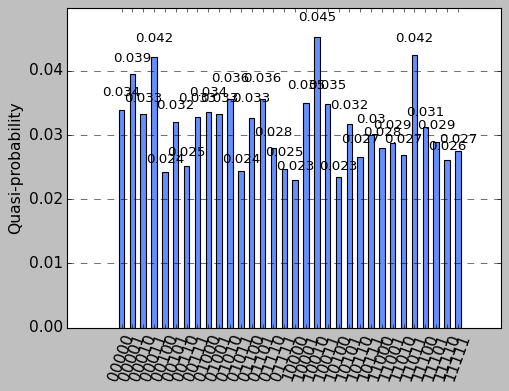

In [10]:
# ibmq_manila 32 QV
with Session(service=service, backend="ibmq_manila") as session:
    sampler_manila = Sampler(session=session, options=options)
    job_manila = sampler_manila.run(circuits=grover_circuit)
    print(f"job_manila ID is {job_manila.job_id()}")
    print(job_manila._status._value_)
    result_manila = job_manila.result()
binary_prob_manila = result_manila.quasi_dists[0].binary_probabilities()

print(dict((k, v) for k, v in binary_prob_manila.items() if v >= 0.02))
plot_histogram([binary_prob_manila])

{'00000': 0.057483241093947826, '00110': 0.058203553926887065, '00111': 0.052197371621386546, '10000': 0.057609017743168775}


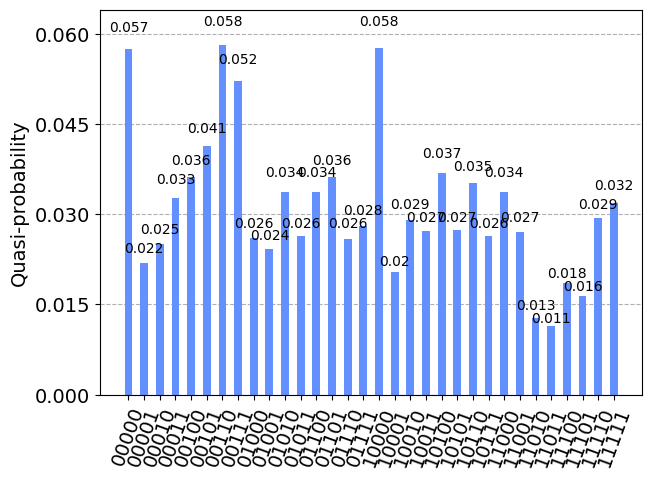

In [3]:
# ibm_perth 32 QV

from qiskit_ibm_runtime import QiskitRuntimeService, Session, Options, Sampler
from qiskit.visualization import plot_histogram

QiskitRuntimeService.save_account(channel="ibm_quantum", token="", overwrite=True)
service = QiskitRuntimeService()

result_perth = service.jobs()[2].result()

binary_prob_perth = result_perth.quasi_dists[0].binary_probabilities()

print(dict((k, v) for k, v in binary_prob_perth.items() if v >= 0.05))
plot_histogram([binary_prob_perth])